In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [41]:
dataset = pd.read_csv("weather.csv")
dataset

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,Humidity9am,RainToday
0,8.0,24.3,0.0,6,68,No
1,14.0,26.9,3.6,4,80,Yes
2,13.7,23.4,3.6,6,82,Yes
3,13.3,15.5,39.8,30,62,Yes
4,7.6,16.1,2.8,20,68,Yes
...,...,...,...,...,...,...
361,9.0,30.7,0.0,7,38,No
362,7.1,28.4,0.0,2,45,No
363,12.5,19.9,0.0,11,63,No
364,12.5,26.9,0.0,6,69,No


In [42]:
dataset.loc[dataset['RainToday']=='Yes','RainToday']=1
dataset.loc[dataset['RainToday']=='No','RainToday']=0
dataset['RainToday'] = dataset['RainToday'].astype(int, errors = 'raise')


In [43]:
dataset.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
WindSpeed9am    0
Humidity9am     0
RainToday       0
dtype: int64

In [44]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,Humidity9am,RainToday
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,9.756831,72.035519,0.180328
std,6.025800,6.690516,4.225800,7.959032,13.137058,0.384987
min,-5.300000,7.600000,0.000000,0.000000,36.000000,0.000000
25%,2.300000,15.025000,0.000000,6.000000,64.000000,0.000000
50%,7.450000,19.650000,0.000000,7.000000,72.000000,0.000000
75%,12.500000,25.500000,0.200000,13.000000,81.000000,0.000000
max,20.900000,35.800000,39.800000,41.000000,99.000000,1.000000


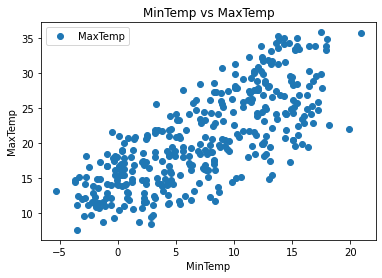

In [45]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

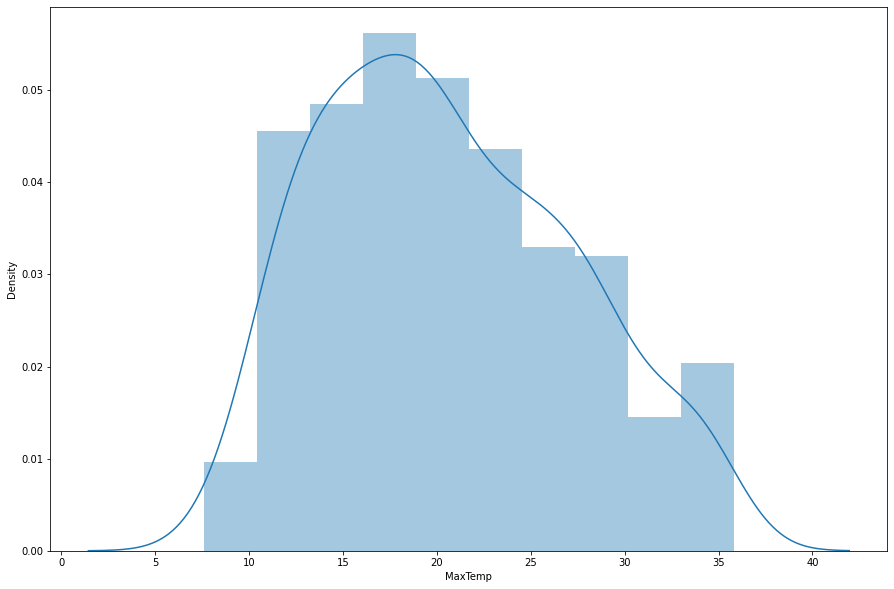

In [46]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [47]:
Y1 = dataset.MaxTemp.values
X1 = dataset.drop(['MaxTemp','RainToday'], axis = 1)
print(X1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size = 0.2, random_state = 0 )
regressor = LinearRegression()
regressor.fit(X1_train, Y1_train) 

     MinTemp  Rainfall  WindSpeed9am  Humidity9am
0        8.0       0.0             6           68
1       14.0       3.6             4           80
2       13.7       3.6             6           82
3       13.3      39.8            30           62
4        7.6       2.8            20           68
..       ...       ...           ...          ...
361      9.0       0.0             7           38
362      7.1       0.0             2           45
363     12.5       0.0            11           63
364     12.5       0.0             6           69
365     12.3       0.0            31           43

[366 rows x 4 columns]


LinearRegression()

In [48]:
print(regressor.intercept_)
print(regressor.coef_)

28.09836479251836
[ 0.8447012  -0.18197967 -0.2954831  -0.1469607 ]


In [49]:
y1_pred = regressor.predict(X1_test)
df = pd.DataFrame({'Actual': Y1_test.flatten(), 'Predicted': y1_pred.flatten()})
df

,Actual,Predicted
0,25.2,25.012468
1,11.5,12.028794
2,21.1,24.768300
3,22.2,23.099584
4,20.4,26.571616
...,...,...
69,18.9,19.501229
70,22.8,27.485055
71,16.1,21.212287
72,25.1,24.539648


In [50]:
Y2 = dataset.RainToday.values
X2 = dataset.drop(['RainToday'], axis = 1)
print(X2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split( X2, Y2, test_size = 0.2, random_state = 0 )
regressor = LinearRegression()
regressor.fit(X2_train, Y2_train) 

     MinTemp  MaxTemp  Rainfall  WindSpeed9am  Humidity9am
0        8.0     24.3       0.0             6           68
1       14.0     26.9       3.6             4           80
2       13.7     23.4       3.6             6           82
3       13.3     15.5      39.8            30           62
4        7.6     16.1       2.8            20           68
..       ...      ...       ...           ...          ...
361      9.0     30.7       0.0             7           38
362      7.1     28.4       0.0             2           45
363     12.5     19.9       0.0            11           63
364     12.5     26.9       0.0             6           69
365     12.3     30.2       0.0            31           43

[366 rows x 5 columns]


LinearRegression()

In [51]:
y2_pred = regressor.predict(X2_test)
df = pd.DataFrame({'Actual': Y2_test.flatten(), 'Predicted': y2_pred.flatten()})
df

,Actual,Predicted
0,0,0.100643
1,0,0.101140
2,1,0.562820
3,0,0.245480
4,0,0.218671
...,...,...
69,0,0.129519
70,0,0.223611
71,0,0.156460
72,0,0.153483
